In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('./train.csv')
unicode_map = {codepoint: char for codepoint, char in pd.read_csv('./unicode_translation.csv').values}

In [3]:
df_train.head()

image_id                                             labels
0  100241706_00004_2  U+306F 1231 3465 133 53 U+304C 275 1652 84 69 ...
1  100241706_00005_1  U+306F 1087 2018 103 65 U+304B 1456 1832 40 73...
2  100241706_00005_2  U+306F 572 1376 125 57 U+306E 1551 2080 69 68 ...
3  100241706_00006_1  U+3082 1455 3009 65 44 U+516B 1654 1528 141 75...
4  100241706_00007_2  U+309D 1201 2949 27 33 U+309D 1196 1539 27 36 ...

In [4]:
labels = df_train[df_train['image_id']=='100241706_00008_2'].labels
print(labels)
print(labels.shape)
type(labels)

6    U+25B2 1648 955 95 44 U+25B2 1887 947 96 45 U+...
Name: labels, dtype: object
(1,)


pandas.core.series.Series

In [5]:
labels = np.array(labels.split(' ')).reshape(-1, 5)

AttributeError: 'Series' object has no attribute 'split'

In [6]:
labels

6    U+25B2 1648 955 95 44 U+25B2 1887 947 96 45 U+...
Name: labels, dtype: object

In [7]:
from PIL import Image, ImageDraw, ImageFont

fontsize = 50

# From https://www.google.com/get/noto/
#!wget -q --show-progress https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKjp-hinted.zip
#!unzip -p NotoSansCJKjp-hinted.zip NotoSansCJKjp-Regular.otf > NotoSansCJKjp-Regular.otf
#!rm NotoSansCJKjp-hinted.zip
! ls ./font


NotoSansCJKjp-Regular.otf


In [8]:
font = ImageFont.truetype('./font/NotoSansCJKjp-Regular.otf', fontsize, encoding='utf-8')

In [9]:
name_list = ['100241706_00006_1', '100241706_00008_2']


In [10]:
img, labels = name_list[1],labels

In [11]:
print (img)
print(labels)

100241706_00008_2
6    U+25B2 1648 955 95 44 U+25B2 1887 947 96 45 U+...
Name: labels, dtype: object


In [12]:
df_train[df_train.image_id==name_list[1] ].index

Int64Index([6], dtype='int64')

In [13]:
df_train.head(8)

image_id                                             labels
0  100241706_00004_2  U+306F 1231 3465 133 53 U+304C 275 1652 84 69 ...
1  100241706_00005_1  U+306F 1087 2018 103 65 U+304B 1456 1832 40 73...
2  100241706_00005_2  U+306F 572 1376 125 57 U+306E 1551 2080 69 68 ...
3  100241706_00006_1  U+3082 1455 3009 65 44 U+516B 1654 1528 141 75...
4  100241706_00007_2  U+309D 1201 2949 27 33 U+309D 1196 1539 27 36 ...
5  100241706_00008_1  U+25B2 1056 929 96 39 U+309D 379 1098 21 43 U+...
6  100241706_00008_2  U+25B2 1648 955 95 44 U+25B2 1887 947 96 45 U+...
7  100241706_00009_1  U+3078 1551 2071 104 41 U+3078 323 1473 135 43...

In [14]:

print(df_train[3:4])
print(df_train.iloc[3])
print(df_train.values[3])

            image_id                                             labels
3  100241706_00006_1  U+3082 1455 3009 65 44 U+516B 1654 1528 141 75...
image_id                                    100241706_00006_1
labels      U+3082 1455 3009 65 44 U+516B 1654 1528 141 75...
Name: 3, dtype: object
['100241706_00006_1'
 'U+3082 1455 3009 65 44 U+516B 1654 1528 141 75 U+309E 1714 1106 80 80 U+306B 403 2050 61 81 U+308B 1692 3291 57 101 U+304B 722 2884 53 104 U+306E 1344 1536 104 111 U+306E 1020 2922 105 113 U+5DF1 380 2662 163 124 U+3064 1981 2991 137 127 U+3053 1355 2648 53 137 U+306C 1640 2490 151 137 U+3092 1644 3414 148 139 U+306A 1973 3287 132 140 U+306F 1640 964 145 140 U+3082 1687 2027 73 141 U+90E8 1957 1203 144 145 U+767E 1640 1664 151 147 U+540C 1323 3065 117 151 U+3042 668 1844 143 153 U+306B 1676 1867 101 157 U+3092 1969 1411 151 163 U+7136 1630 3097 191 163 U+5618 1623 1275 197 164 U+304D 1027 1732 93 167 U+308A 715 1660 55 168 U+305A 664 3310 181 168 U+3089 2005 3430 119 169 U+6893

NameError: name 'mylist' is not defined

In [16]:
# This function takes in a filename of an image, and the labels in the string format given in train.csv, and returns an image containing the bounding boxes and characters annotated
def visualize_training_data(image_fn, labels):
    # Convert annotation string to array
    labels = np.array(labels.split(' ')).reshape(-1, 5)
    
    # Read image
    imsource = Image.open(image_fn).convert('RGBA')
    bbox_canvas = Image.new('RGBA', imsource.size)
    char_canvas = Image.new('RGBA', imsource.size)
    bbox_draw = ImageDraw.Draw(bbox_canvas) # Separate canvases for boxes and chars so a box doesn't cut off a character
    char_draw = ImageDraw.Draw(char_canvas)

    for codepoint, x, y, w, h in labels:
        x, y, w, h = int(x), int(y), int(w), int(h)
        char = unicode_map[codepoint] # Convert codepoint to actual unicode character

        # Draw bounding box around character, and unicode character next to it
        bbox_draw.rectangle((x, y, x+w, y+h), fill=(255, 255, 255, 0), outline=(255, 0, 0, 255))
        char_draw.text((x + w + fontsize/4, y + h/2 - fontsize), char, fill=(0, 0, 255, 255), font=font)

    imsource = Image.alpha_composite(Image.alpha_composite(imsource, bbox_canvas), char_canvas)
    imsource = imsource.convert("RGB") # Remove alpha for saving in jpg format.
    return np.asarray(imsource)

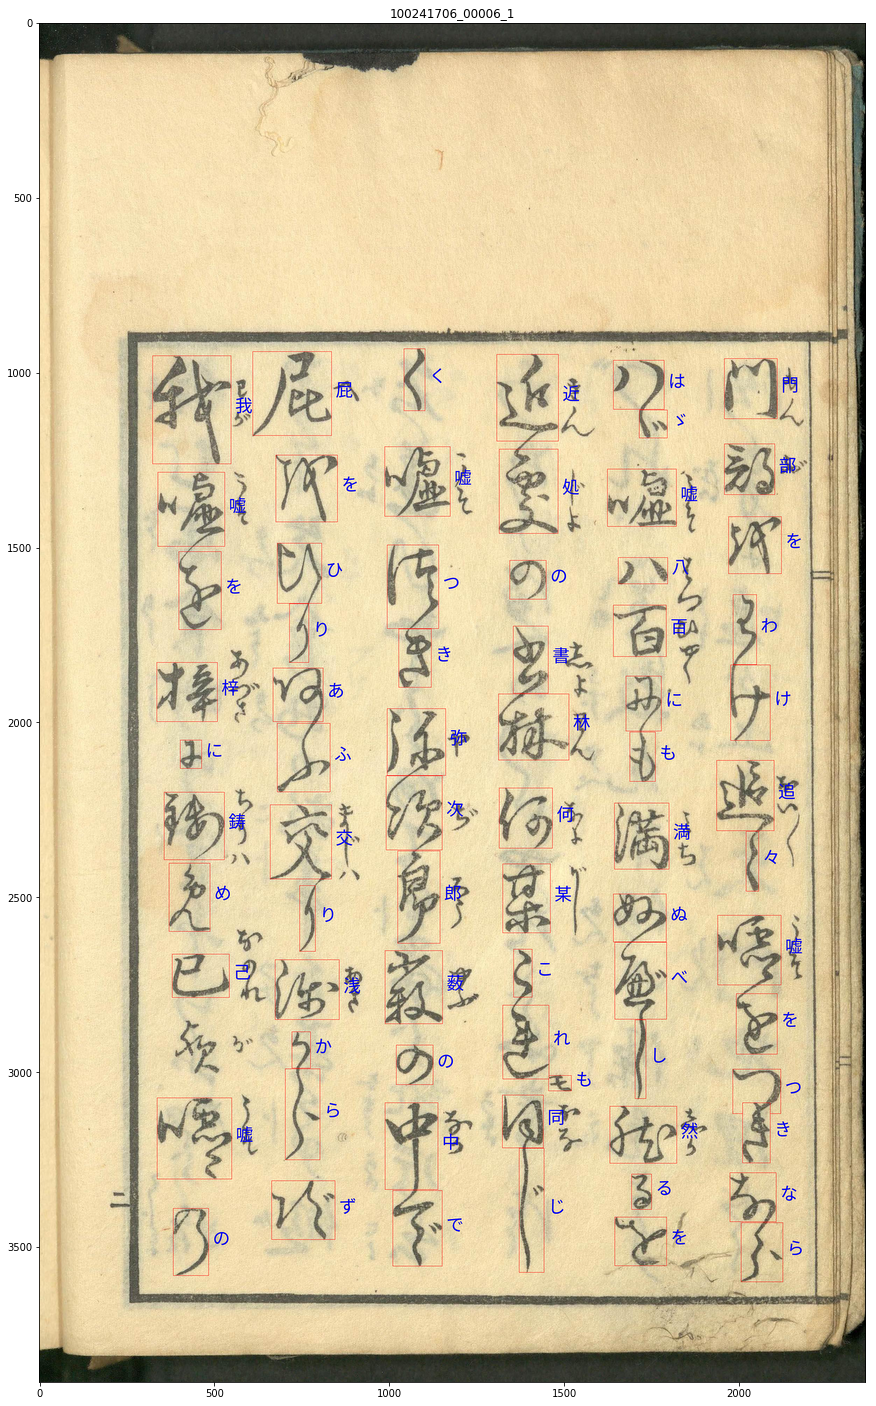

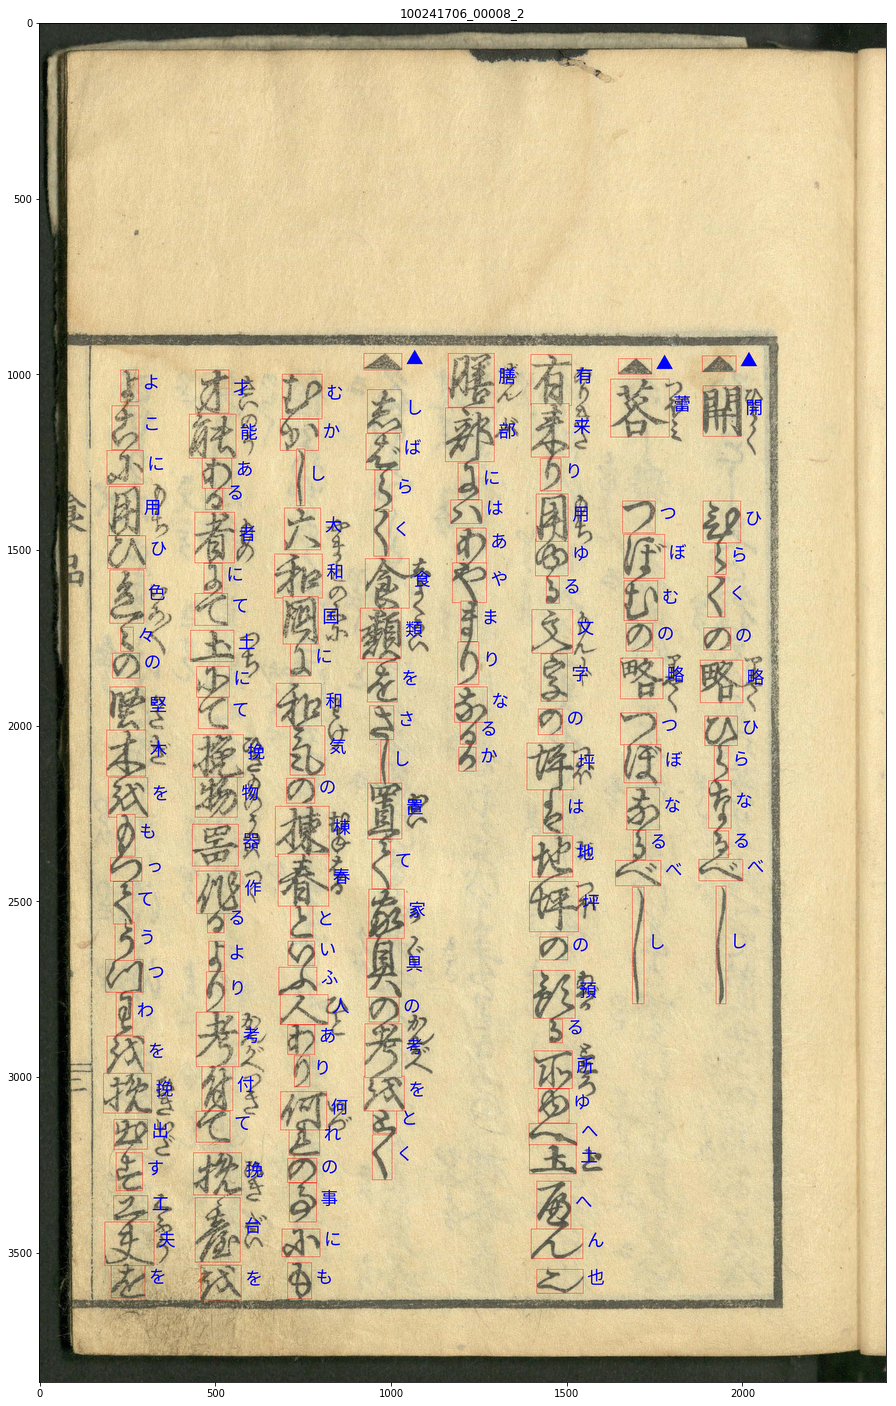

In [17]:
mylist=[3,6]
for i in mylist:
    number = np.random.randint(len(df_train));
    
    img, labels = df_train.values[i]
    viz = visualize_training_data('./images/{}.jpg'.format(img), labels)
    
    plt.figure(figsize=(25, 25))
    plt.title(img)
    plt.imshow(viz, interpolation='lanczos')
    plt.show()